In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [3]:
train_data

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
...,...,...,...
3945,3945,기타 괴롭힘 대화,준하야 넌 대가리가 왜이렇게 크냐?\n내 머리가 뭐.\n밥먹으면 대가리만 크냐 너는...
3946,3946,갈취 대화,내가 지금 너 아들 김길준 데리고 있어. 살리고 싶으면 계좌에 1억만 보내\n예.?...
3947,3947,직장 내 괴롭힘 대화,나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게 살지.\n왜 그래. 들리겠어...
3948,3948,갈취 대화,누구맘대로 여기서 장사하래?\n이게 무슨일입니까?\n남의 구역에서 장사하려면 자릿세...


In [4]:
test_data

,idx,text
0,t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
1,t_001,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...
2,t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...
3,t_003,이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...
4,t_004,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...
...,...,...
495,t_495,미나씨 휴가 결제 올리기 전에 저랑 상의하라고 말한거 기억해요? 네 합니다. 보고서...
496,t_496,교수님 제 논문에 제 이름이 없나요? 아 무슨 논문말이야? 지난 번 냈던 논문이...
497,t_497,야 너 네 저요? 그래 너 왜요 돈좀 줘봐 돈 없어요 돈이 왜 없어 지갑은 폼이...
498,t_498,야 너 빨리 안 뛰어와? 너 이 환자 제대로 봤어 안 봤어 어제 저녁부터 계속 보다...


In [5]:
# 학습데이터 문장 최대 길이 확인
train_data['text_length'] = train_data['conversation'].apply(len)
train_max_len = train_data[train_data['text_length'] == train_data['text_length'].max()]

In [6]:
train_data

,idx,class,conversation,text_length
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...,242
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...,188
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...,218
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...,115
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...,460
...,...,...,...,...
3945,3945,기타 괴롭힘 대화,준하야 넌 대가리가 왜이렇게 크냐?\n내 머리가 뭐.\n밥먹으면 대가리만 크냐 너는...,233
3946,3946,갈취 대화,내가 지금 너 아들 김길준 데리고 있어. 살리고 싶으면 계좌에 1억만 보내\n예.?...,223
3947,3947,직장 내 괴롭힘 대화,나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게 살지.\n왜 그래. 들리겠어...,301
3948,3948,갈취 대화,누구맘대로 여기서 장사하래?\n이게 무슨일입니까?\n남의 구역에서 장사하려면 자릿세...,225


In [7]:
train_max_len

,idx,class,conversation,text_length
1213,1213,기타 괴롭힘 대화,네 아버님 안녕하십니까. 저는 따님의 남편이 될 길동 입니다.\n어. 어서 오시게....,874


In [8]:
# 테스트데이터 문장 최대 길이 확인
test_data['text_length'] = test_data['text'].apply(len)
test_max_len = test_data[test_data['text_length'] == test_data['text_length'].max()]

In [9]:
test_data

,idx,text,text_length
0,t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...,222
1,t_001,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...,275
2,t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...,106
3,t_003,이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...,112
4,t_004,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...,104
...,...,...,...
495,t_495,미나씨 휴가 결제 올리기 전에 저랑 상의하라고 말한거 기억해요? 네 합니다. 보고서...,192
496,t_496,교수님 제 논문에 제 이름이 없나요? 아 무슨 논문말이야? 지난 번 냈던 논문이...,280
497,t_497,야 너 네 저요? 그래 너 왜요 돈좀 줘봐 돈 없어요 돈이 왜 없어 지갑은 폼이...,79
498,t_498,야 너 빨리 안 뛰어와? 너 이 환자 제대로 봤어 안 봤어 어제 저녁부터 계속 보다...,597


In [10]:
test_max_len

,idx,text,text_length
174,t_174,아효 덥네. 저 조금만 쉬겠습니다. 야 선풍기 가져간다. 너 어쩌피 쉴 거라며. 네...,722


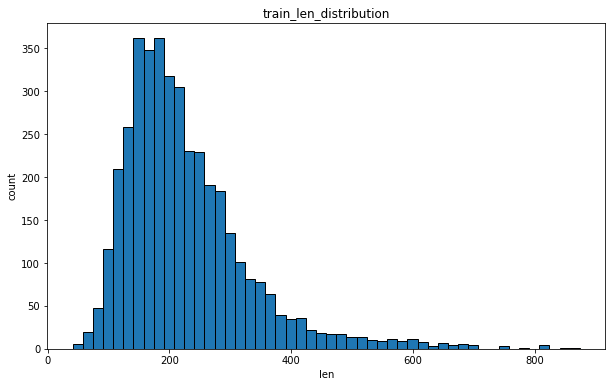

In [36]:
#학습데이터 문장길이 분포 시각화

plt.figure(figsize=(10, 6))
plt.hist(x='text_length', data=train_data, bins=50, edgecolor='black')
plt.title('train_len_distribution')
plt.xlabel('len')
plt.ylabel('count')
plt.show()

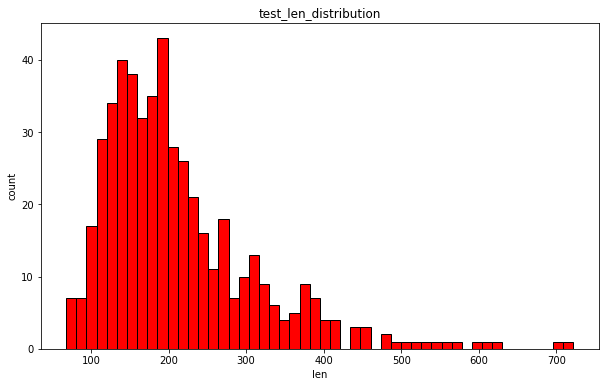

In [37]:
#테스트데이터 문장길이 분포 시각화

plt.figure(figsize=(10, 6))
plt.hist(x='text_length', data=test_data, color= 'red', bins=50, edgecolor='black')
plt.title('test_len_distribution')
plt.xlabel('len')
plt.ylabel('count')
plt.show()

In [13]:
import re

In [14]:
# 특수기호 찾아내는 함수 생성

def find_all_special_chars(df):
    pattern = re.compile(r"[^가-힣a-zA-Z0-9]")
    all_text = " ".join(df.astype(str).values.flatten())
    special_chars = set(pattern.findall(all_text))

    return special_chars

In [18]:
# 학습데이터에 사용된 특수기호 목록
train_special_chars = find_all_special_chars(train_data['conversation'])
train_special_chars

{'\n', ' ', '!', "'", '.', '?', '”', '\u3000', '？'}

In [20]:
# 테스트데이터에 사용된 특수기호 목록
test_special_chars = find_all_special_chars(test_data['text'])
test_special_chars

{'\n', ' ', '!', "'", ',', '.', '?'}

In [41]:
# '\u3000' 포함된 문장 확인
# 알고보니 '\u3000'는 전각공백문자였음

outlier_chars = train_data['conversation'].apply(lambda x: re.compile(r"[\u3000 ]").findall(x))
outlier_chars

0       [ ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
1       [ ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
2       [ ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
3       [ ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
4       [ ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
                              ...                        
3945    [ ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
3946    [ ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
3947    [ ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
3948    [ ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
3949    [ ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...
Name: conversation, Length: 3950, dtype: object

In [44]:
# 클래스 확인

train_data['class'].unique()

array(['협박 대화', '기타 괴롭힘 대화', '갈취 대화', '직장 내 괴롭힘 대화'], dtype=object)

In [46]:
# 클래스 분포 확인
train_data['class'].value_counts()

기타 괴롭힘 대화      1094
갈취 대화           981
직장 내 괴롭힘 대화     979
협박 대화           896
Name: class, dtype: int64